In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
# Don't pay attention to this
# This is to keep kernel from dying
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
y_train = to_categorical(np.array(train['label']))
y_test = to_categorical(np.array(test['label']))
x_train = np.array(train.drop('label',axis = 1).astype(np.float32) / 255)
x_test = np.array(test.drop('label',axis=1).astype(np.float32) / 255)

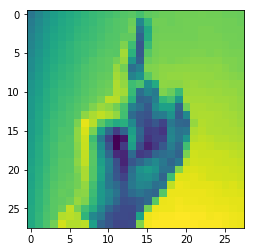

In [6]:
x = x_train.reshape(-1,28,28)
plt.imshow(x[0])

In [7]:
x_train_img = x_train.reshape(-1,28,28,1)
x_test_img = x_test.reshape(-1,28,28,1)

In [8]:
def Model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3),padding = 'same', activation='relu', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(64, (3, 3),padding = 'same',  activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3),padding = 'same',  activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense((128),activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense((25),activation='softmax'))
    
    return model

In [9]:
model = Model()

W0909 17:51:26.635682 140735944115072 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train_img,y_train,batch_size=32,validation_data=[x_test_img,y_test],epochs=5)

Train on 27455 samples, validate on 7172 samples
Epoch 1/5
27455/27455 [==============================] - 63s 2ms/sample - loss: 1.4467 - acc: 0.5431 - val_loss: 0.4683 - val_acc: 0.8387
Epoch 2/5
27455/27455 [==============================] - 61s 2ms/sample - loss: 0.2667 - acc: 0.9082 - val_loss: 0.2482 - val_acc: 0.9354
Epoch 3/5
27455/27455 [==============================] - 62s 2ms/sample - loss: 0.1353 - acc: 0.9529 - val_loss: 0.2089 - val_acc: 0.9387
Epoch 4/5
27455/27455 [==============================] - 61s 2ms/sample - loss: 0.0845 - acc: 0.9705 - val_loss: 0.2322 - val_acc: 0.9349
Epoch 5/5
27455/27455 [==============================] - 62s 2ms/sample - loss: 0.0642 - acc: 0.9781 - val_loss: 0.2108 - val_acc: 0.9449


In [17]:
model.save('trained_model.h5')